# Example 9.6: Jet Propulsion (Cold-Air-Standard)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement



## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.kSI import *
   
air = idealgas.Properties('Air')

### Given Parameters
We now define variables to hold our known values.

In [2]:
T[1] = Quantity(-40,'degC')   # Inlet Temperature
p[1] = Quantity(35,'kPa')     # Compressor Inlet pressure
r_p = Quantity(10,' ')        # Pressure ratio
T[4] = Quantity(1000,'degC')  # Turbine inlet temperature
mdot = Quantity(50,'kg/s')    # mass flow rate
V=Vel
V[1] = Quantity(250,'m/s')

Summary();

<IPython.core.display.Latex object>

,T,p,Vel
unit,K,kPa,m/s
1,233.15,35.0,250.0
4,1273.15,-,-


### Assumptions
- Cold-air-standard Analysis
  - Ideal gas
  - Constant specific heat (evaluated at $25^\circ\text{C}$)
- Isobaric heat exchagners: Combustors
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
%%showcalc
# Ideal Gas
R = air.R

 Ideal Gas

<IPython.core.display.Latex object>

#### (a) $w_{net}$

In [4]:
%%showcalc
#### 1$\to$2) Diffuser
#### State 1
h[1] = air.h(T[1],p[1])
s[1] = air.s(T[1],p[1])
states.fix(1,air)

#### 1-2) Isentropic Ram
h[2] = h[1] + Vel[1]**2/(2)
s[2] = s[1]
states.fix(2,air)

#### $2\to3$) Isentropic compression
p[3] = p[2]*r_p
s[3] = s[2]
states.fix(3,air)
Wdot_2_to_3 = mdot*(h[2]-h[3])

#### $3\to4$) Combustion
p[4]=p[3]
states.fix(4,air)
Qdot_3_to_4 = mdot*(h[4]-h[3])

#### $4\to5$) Turbine
Wdot_4_to_3 = -Wdot_2_to_3
h[5] = h[4] - Wdot_4_to_3/mdot
s[5] = s[4]
states.fix(5,air)

#### $5\to6$) Isentropic Expansion
p[6] = p[1]
s[6] = s[5]
states.fix(6,air)
Vel[6] = (2*(h[5]-h[6]))**0.5

### 1$\to$2) Diffuser

### State 1

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 1-2) Isentropic Ram

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### $2\to3$) Isentropic compression

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### $3\to4$) Combustion

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### $4\to5$) Turbine

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### $5\to6$) Isentropic Expansion

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
states.display();

,T,p,v,u,h,s,Vel,k
unit,K,kPa,m³/kg,kJ/kg,kJ/kg,kJ/K/kg,m/s,
1,233.150000,35.000000,1.912179,-136.417276,-69.490971,6.756083,250.0,1.401078
2,264.308029,54.250113,1.398528,-114.111268,-38.240971,6.756083,-,1.400784
3,507.682627,542.501128,0.268629,62.829467,208.561067,6.756083,-,1.385675
4,1273.150000,542.501128,0.673659,695.573154,1061.034125,7.768954,-,1.320959
5,1061.577521,259.289269,1.175246,509.503554,814.232088,7.768954,-,1.332377
6,630.518973,35.000000,5.171203,155.802439,336.794527,7.768954,977.177119,1.372603


#### (b) Net Thrust

In [6]:
%%showcalc
F_Net = mdot*(V[6]-V[1])
F_Net.ito('N')

<IPython.core.display.Latex object>

#### (c) Propulsive Power

In [7]:
%%showcalc
Wdot_P = F_Net*V[1]
Wdot_P.ito('W') 

<IPython.core.display.Latex object>

#### (d) Propulsive Efficiency

In [8]:
%%showcalc
eta_P = Wdot_P/Qdot_3_to_4
eta_P.ito('') 

<IPython.core.display.Latex object>

#### Summary of Results

In [9]:
Summary()
Summary(['F_Net','Wdot_P','eta_P']);

<IPython.core.display.Latex object>

,T,p,v,u,h,s,Vel,k
unit,K,kPa,m³/kg,kJ/kg,kJ/kg,kJ/K/kg,m/s,
1,233.150000,35.000000,1.912179,-136.417276,-69.490971,6.756083,250.0,1.401078
2,264.308029,54.250113,1.398528,-114.111268,-38.240971,6.756083,-,1.400784
3,507.682627,542.501128,0.268629,62.829467,208.561067,6.756083,-,1.385675
4,1273.150000,542.501128,0.673659,695.573154,1061.034125,7.768954,-,1.320959
5,1061.577521,259.289269,1.175246,509.503554,814.232088,7.768954,-,1.332377
6,630.518973,35.000000,5.171203,155.802439,336.794527,7.768954,977.177119,1.372603


<IPython.core.display.Latex object>

#### (a) Sketch a $p$−$v$ diagram for the cycle

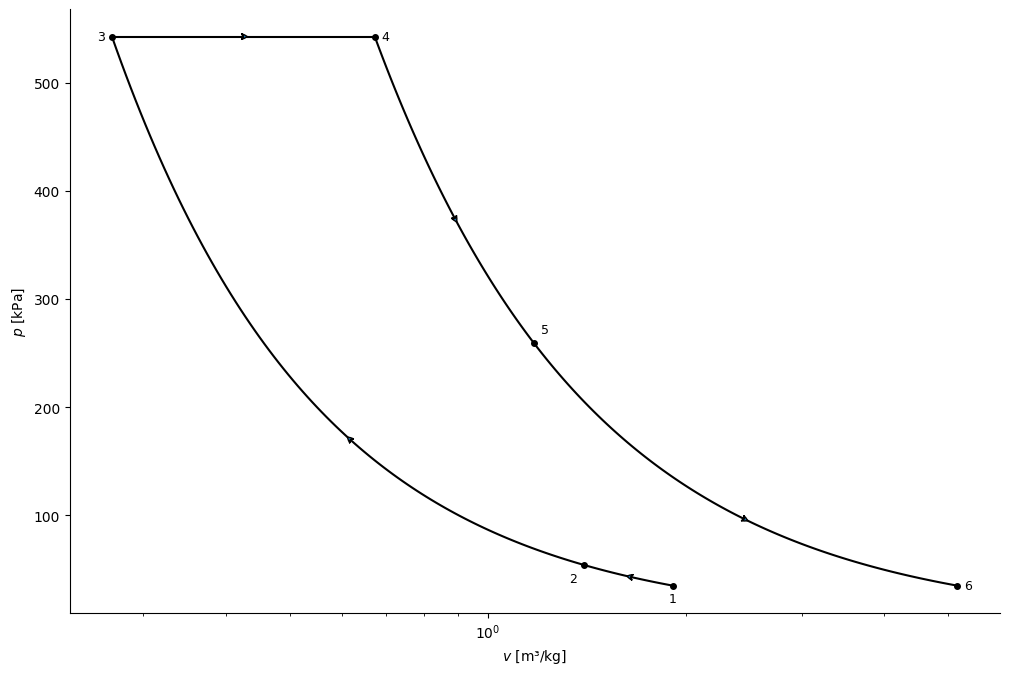

In [10]:
pv = air.pv_diagram(log_x=True)

# The following loop plots and labels a point for each state
p[5] = air.p(T[5],v[5])

pv.plot_state(states[1], label_loc='south')
pv.plot_state(states[2], label_loc='south west')
pv.plot_state(states[3], label_loc='west')
pv.plot_state(states[4], label_loc='east')
pv.plot_state(states[5], label_loc='north east')
pv.plot_state(states[6], label_loc='east')

# Enter an appropriate path descriptor for each process, i.e. 'isothermal','isobaric','isochoric','isenthalpic','isentropic','nonideal'
pv.plot_process(states[1],states[2], path='isentropic') # 1->2
pv.plot_process(states[2],states[3], path='isentropic') # 2->3
pv.plot_process(states[3],states[4], path='isobaric') # 3->4
pv.plot_process(states[4],states[5], path='isentropic') # 4->5
pv.plot_process(states[5],states[6], path='isentropic'); # 5->6


#### (g) $T$-$s$ diagram

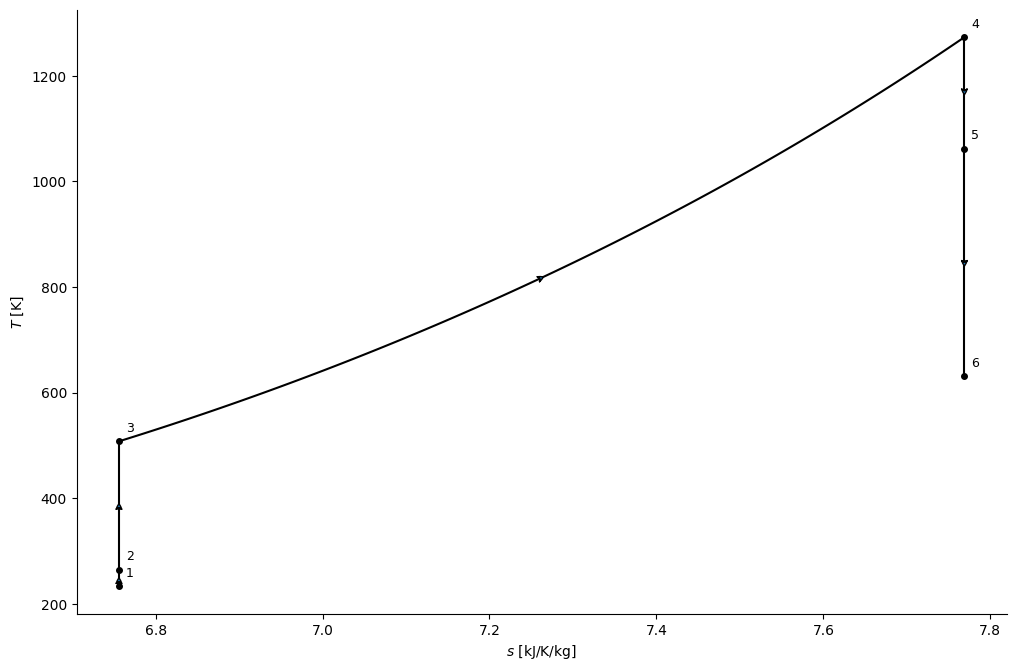

In [11]:
Ts = air.Ts_diagram()
# The following loop plots and labels a point for each state
for state in [1,2,3,4,5,6]:
    Ts.plot_state(states[state], label_loc='north east')

# Enter an appropriate path descriptor for each process, i.e. 'isothermal','isobaric','isochoric','isenthalpic','isentropic'
Ts.plot_process(states[1],states[2], path='isentropic') # 1->2
Ts.plot_process(states[2],states[3], path='isentropic') # 2->3
Ts.plot_process(states[3],states[4], path='isobaric') # 3->4
Ts.plot_process(states[4],states[5], path='isentropic') # 4->5
Ts.plot_process(states[5],states[6], path='isentropic'); # 5->6